<a href="https://colab.research.google.com/github/tamayodb/CCDEPLRL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [261]:
# !wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

In [262]:
# !unzip fruits.zip

Import the libraries

In [263]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [264]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [265]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 560 files belonging to 4 classes.
Found 86 files belonging to 4 classes.
Found 210 files belonging to 4 classes.


Display sample images from the dataset

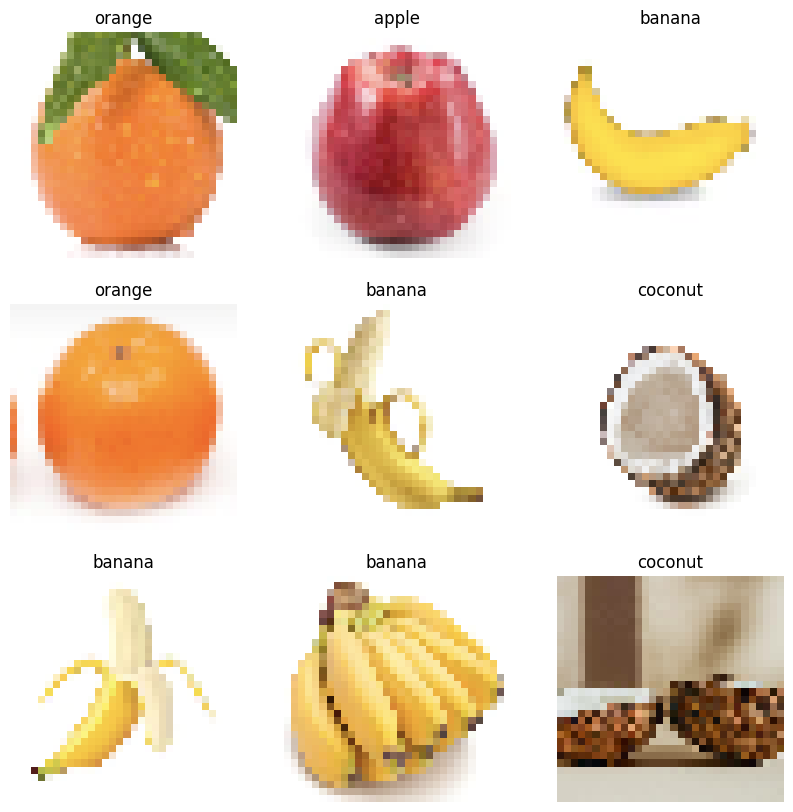

In [266]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()


Create the Convolutional Neural Network Model (CNN)

In [267]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Define the optimizer and loss function

In [268]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [269]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.4189 - loss: 1.1999 - val_accuracy: 0.8488 - val_loss: 0.4847
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.8586 - loss: 0.4156 - val_accuracy: 0.8721 - val_loss: 0.4584
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.8740 - loss: 0.3150 - val_accuracy: 0.9070 - val_loss: 0.2807
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9088 - loss: 0.2379 - val_accuracy: 0.8023 - val_loss: 0.4623
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.9527 - loss: 0.1616 - val_accuracy: 0.9186 - val_loss: 0.2683
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9450 - loss: 0.1527 - val_accuracy: 0.9186 - val_loss: 0.1960
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9678 - loss: 0.1101 - val_accuracy: 0.9302 - val_loss: 0.1964
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.9816 - loss: 0.0617 - val_accuracy: 0.

Test the model

In [270]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9651 - loss: 0.1968


[0.12975431978702545, 0.9714285731315613]

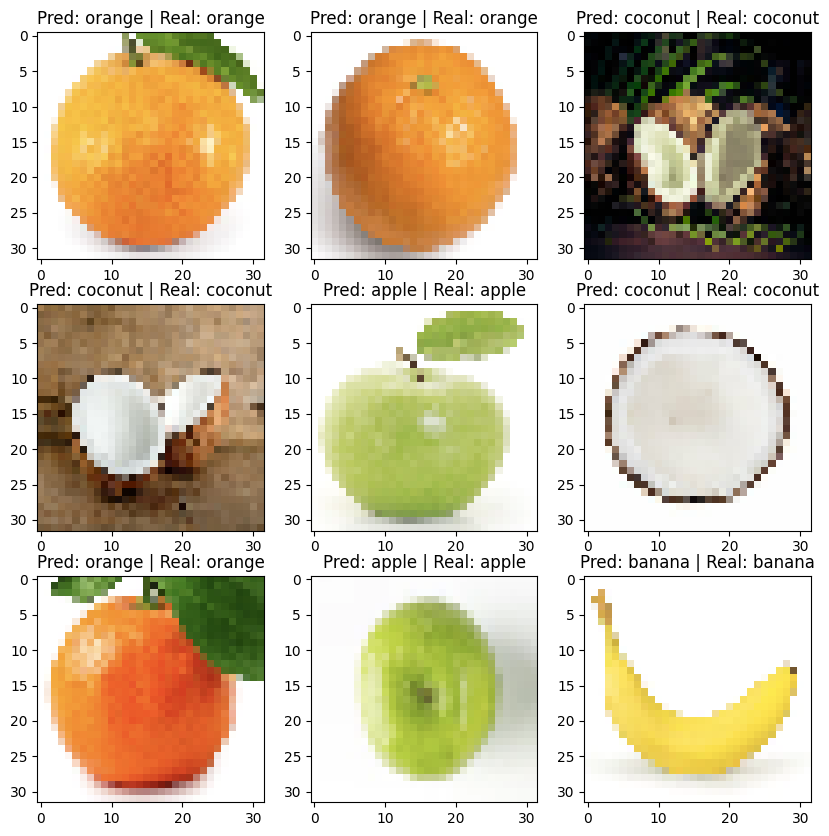

In [271]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [272]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpqfpjil3t'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_1075')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136917978397968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136917978389712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136917978391056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136917978394512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136918080815568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136918080826512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136918080815376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136918080824592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136918080825744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136918080824400: TensorSpec(shape=(), dtype=tf.resource, name=None)
